In [1]:
%load_ext tensorboard

In [8]:
import datetime
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import tensorflow as tf
#from torchvision import datasets
#from torchvision import transforms
#from torch.utils.data.sampler import SubsetRandomSampler

In [9]:
import cv2
import PIL.Image
import matplotlib 
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import shutil
import posixpath
import sys 
import glob
import wfdb
import pandas as pd
import math
from PIL import Image 

In [4]:
#start at images directory
path = r'ptb_ecg_filtered/*.png'
image_files = glob.glob(path)

In [8]:
image_files[0:4]##list of image files

['ptb_ecg_filtered\\sample_ecg_0.png',
 'ptb_ecg_filtered\\sample_ecg_1.png',
 'ptb_ecg_filtered\\sample_ecg_10.png',
 'ptb_ecg_filtered\\sample_ecg_100.png']

In [14]:
##split train and test images with a ratio of 80:20
##split into 2 lists, a train and a test list of png files
train_dir = './ptb_ecg_filtered/train'
test_dir = './ptb_ecg_filtered/test'

In [10]:
len(image_files) ##split 298 into 80% train and 20% test

298

In [34]:
training_index = len(image_files) * (80/100)
training_index = math.ceil(training_index)

In [35]:
train_list = image_files[:training_index] 
test_list = image_files[training_index:]

In [36]:
train_list[0:4]

['ptb_ecg_filtered\\sample_ecg_0.png',
 'ptb_ecg_filtered\\sample_ecg_1.png',
 'ptb_ecg_filtered\\sample_ecg_10.png',
 'ptb_ecg_filtered\\sample_ecg_100.png']

In [37]:
test_list[0:4]

['ptb_ecg_filtered\\sample_ecg_46.png',
 'ptb_ecg_filtered\\sample_ecg_47.png',
 'ptb_ecg_filtered\\sample_ecg_48.png',
 'ptb_ecg_filtered\\sample_ecg_49.png']

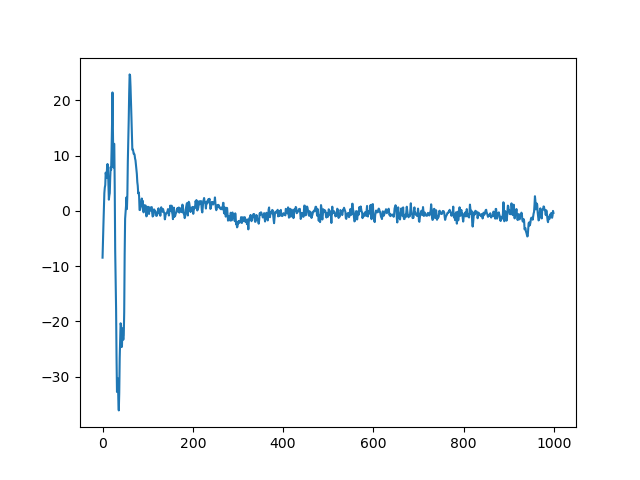

In [44]:
img = Image.open(train_list[100])
img

In [94]:
image_files = []
for file in os.listdir('./ptb_ecg_filtered'):
     if '.png' in file.lower():
        image_files.append(file)

In [95]:
train_list = image_files[:training_index]
train_list[0:4]

['sample_ecg_0.png',
 'sample_ecg_1.png',
 'sample_ecg_10.png',
 'sample_ecg_100.png']

In [96]:
test_list = image_files[training_index:]
test_list[0:4]

['sample_ecg_46.png',
 'sample_ecg_47.png',
 'sample_ecg_48.png',
 'sample_ecg_49.png']

In [110]:
#move to corresponding directories
for image in train_list:
    old_path = './ptb_ecg_filtered/' + image
    new_path = './ptb_ecg_filtered/train/' + image
    os.replace(old_path, new_path)

In [111]:
for image in test_list:
    old_path = './ptb_ecg_filtered/' + image
    new_path = './ptb_ecg_filtered/test/' + image
    os.replace(old_path, new_path)

In [49]:
width = 640#img.width 
height = 480#img.height 

print(width/10, height/10)

64.0 48.0


In [50]:
input_shape = (width/10, height/10, 3)
print("Input to AlexNet is:", input_shape)

Input to AlexNet is: (64.0, 48.0, 3)


### START MODEL HERE
### TEST ONE: TRY FUNCTIONAL MODEL WITH CUSTOM GPU

### TEST TWO: TRY WITH SEQUENTIAL MODEL, Standard Keras

### TEST THREE: TRY WITH FUNCTIONAL MODEL, PyTorch

### TEST FOUR: STANDARD SEQUENTIAL MODEL ON IMAGES WITHOUT EXTERNAL TENSOR GENERATION

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 10})

device_count {
  key: "GPU"
  value: 1
}
device_count {
  key: "CPU"
  value: 10
}

In [39]:
#run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)

In [72]:
#(640, 480, 3)  ##original, too big tensors, use other sizes to decrease exhaustion of gpu 
#tf2 doesn't have runoptions, check above after trials
# 128,96,3  #(320, 240, 3) #512, 384 ##find best divisor

In [29]:
for image in os.listdir('./ptb_ecg_filtered/train/Bundle branch block'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Bundle branch block/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Bundle branch block/' + name)

1164_ Bundle branch block.png
1165_ Bundle branch block.png
1166_ Bundle branch block.png
1182_ Bundle branch block.png
1183_ Bundle branch block.png
1184_ Bundle branch block.png
1284_ Bundle branch block.png
1285_ Bundle branch block.png
1286_ Bundle branch block.png
1296_ Bundle branch block.png
1297_ Bundle branch block.png
1298_ Bundle branch block.png
1299_ Bundle branch block.png
1300_ Bundle branch block.png
1301_ Bundle branch block.png
1302_ Bundle branch block.png
1303_ Bundle branch block.png
1304_ Bundle branch block.png
1305_ Bundle branch block.png
1306_ Bundle branch block.png
1307_ Bundle branch block.png
1311_ Bundle branch block.png
1312_ Bundle branch block.png
1313_ Bundle branch block.png
1317_ Bundle branch block.png
1318_ Bundle branch block.png
1319_ Bundle branch block.png
1320_ Bundle branch block.png
1321_ Bundle branch block.png
1322_ Bundle branch block.png
1323_ Bundle branch block.png
1324_ Bundle branch block.png
1325_ Bundle branch block.png
1335_ Bund

In [30]:
for image in os.listdir('./ptb_ecg_filtered/train/Cardiomyopathy'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Cardiomyopathy/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Cardiomyopathy/' + name)

1020_ Cardiomyopathy.png
1021_ Cardiomyopathy.png
1022_ Cardiomyopathy.png
1023_ Cardiomyopathy.png
1024_ Cardiomyopathy.png
1025_ Cardiomyopathy.png
1029_ Cardiomyopathy.png
1030_ Cardiomyopathy.png
1031_ Cardiomyopathy.png
1047_ Cardiomyopathy.png
1048_ Cardiomyopathy.png
1049_ Cardiomyopathy.png
1146_ Cardiomyopathy.png
1147_ Cardiomyopathy.png
1148_ Cardiomyopathy.png
1290_ Cardiomyopathy.png
1291_ Cardiomyopathy.png
1292_ Cardiomyopathy.png
1293_ Cardiomyopathy.png
1294_ Cardiomyopathy.png
1295_ Cardiomyopathy.png
1341_ Cardiomyopathy.png
1342_ Cardiomyopathy.png
1343_ Cardiomyopathy.png
1362_ Cardiomyopathy.png
1363_ Cardiomyopathy.png
1364_ Cardiomyopathy.png
1398_ Cardiomyopathy.png
1399_ Cardiomyopathy.png
1400_ Cardiomyopathy.png
1491_ Cardiomyopathy.png
1492_ Cardiomyopathy.png
1493_ Cardiomyopathy.png
1494_ Cardiomyopathy.png
1495_ Cardiomyopathy.png
1496_ Cardiomyopathy.png
1500_ Cardiomyopathy.png
1501_ Cardiomyopathy.png
1502_ Cardiomyopathy.png
1503_ Cardiomyopathy.png


In [31]:
for image in os.listdir('./ptb_ecg_filtered/train/Dysrhythmia'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Dysrhythmia/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Dysrhythmia/' + name)

1038_ Dysrhythmia.png
1039_ Dysrhythmia.png
1040_ Dysrhythmia.png
1077_ Dysrhythmia.png
1078_ Dysrhythmia.png
1079_ Dysrhythmia.png
1092_ Dysrhythmia.png
1093_ Dysrhythmia.png
1094_ Dysrhythmia.png
1098_ Dysrhythmia.png
1099_ Dysrhythmia.png
1100_ Dysrhythmia.png
1110_ Dysrhythmia.png
1111_ Dysrhythmia.png
1112_ Dysrhythmia.png
1149_ Dysrhythmia.png
1150_ Dysrhythmia.png
1151_ Dysrhythmia.png
1152_ Dysrhythmia.png
1153_ Dysrhythmia.png
1154_ Dysrhythmia.png
1188_ Dysrhythmia.png
1189_ Dysrhythmia.png
1190_ Dysrhythmia.png
1239_ Dysrhythmia.png
1240_ Dysrhythmia.png
1241_ Dysrhythmia.png
1350_ Dysrhythmia.png
1351_ Dysrhythmia.png
1352_ Dysrhythmia.png
1506_ Dysrhythmia.png
1507_ Dysrhythmia.png
1508_ Dysrhythmia.png
1611_ Dysrhythmia.png
1612_ Dysrhythmia.png
1613_ Dysrhythmia.png
963_ Dysrhythmia.png
964_ Dysrhythmia.png
965_ Dysrhythmia.png
972_ Dysrhythmia.png
973_ Dysrhythmia.png
974_ Dysrhythmia.png
975_ Dysrhythmia.png
976_ Dysrhythmia.png
977_ Dysrhythmia.png
978_ Dysrhythmia.pn

In [32]:
for image in os.listdir('./ptb_ecg_filtered/train/Healthy control'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Healthy control/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Healthy control/' + name)

1005_ Healthy control.png
1006_ Healthy control.png
1007_ Healthy control.png
1008_ Healthy control.png
1009_ Healthy control.png
1010_ Healthy control.png
1035_ Healthy control.png
1036_ Healthy control.png
1037_ Healthy control.png
1089_ Healthy control.png
1090_ Healthy control.png
1091_ Healthy control.png
1104_ Healthy control.png
1105_ Healthy control.png
1106_ Healthy control.png
1107_ Healthy control.png
1108_ Healthy control.png
1109_ Healthy control.png
1137_ Healthy control.png
1138_ Healthy control.png
1139_ Healthy control.png
1140_ Healthy control.png
1141_ Healthy control.png
1142_ Healthy control.png
1143_ Healthy control.png
1144_ Healthy control.png
1145_ Healthy control.png
1155_ Healthy control.png
1156_ Healthy control.png
1157_ Healthy control.png
1158_ Healthy control.png
1159_ Healthy control.png
1160_ Healthy control.png
1161_ Healthy control.png
1162_ Healthy control.png
1163_ Healthy control.png
1167_ Healthy control.png
1168_ Healthy control.png
1169_ Health

In [33]:
for image in os.listdir('./ptb_ecg_filtered/train/Heart failure (NYHA 2)'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Heart failure (NYHA 2)/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Heart failure (NYHA 2)/' + name)

984_ Heart failure (NYHA 2).png
985_ Heart failure (NYHA 2).png
986_ Heart failure (NYHA 2).png


In [34]:
for image in os.listdir('./ptb_ecg_filtered/train/Heart failure (NYHA 3)'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Heart failure (NYHA 3)/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Heart failure (NYHA 3)/' + name)

996_ Heart failure (NYHA 3).png
997_ Heart failure (NYHA 3).png
998_ Heart failure (NYHA 3).png


In [35]:
for image in os.listdir('./ptb_ecg_filtered/train/Heart failure (NYHA 4)'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Heart failure (NYHA 4)/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Heart failure (NYHA 4)/' + name)

1011_ Heart failure (NYHA 4).png
1012_ Heart failure (NYHA 4).png
1013_ Heart failure (NYHA 4).png


In [36]:
for image in os.listdir('./ptb_ecg_filtered/train/Hypertrophy'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Hypertrophy/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Hypertrophy/' + name)

1119_ Hypertrophy.png
1120_ Hypertrophy.png
1121_ Hypertrophy.png
1326_ Hypertrophy.png
1327_ Hypertrophy.png
1328_ Hypertrophy.png
1332_ Hypertrophy.png
1333_ Hypertrophy.png
1334_ Hypertrophy.png
1344_ Hypertrophy.png
1345_ Hypertrophy.png
1346_ Hypertrophy.png
1359_ Hypertrophy.png
1360_ Hypertrophy.png
1361_ Hypertrophy.png
1380_ Hypertrophy.png
1381_ Hypertrophy.png
1382_ Hypertrophy.png
1476_ Hypertrophy.png
1477_ Hypertrophy.png
1478_ Hypertrophy.png


In [37]:
for image in os.listdir('./ptb_ecg_filtered/train/Myocardial Infarction'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Myocardial Infarction/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Myocardial Infarction/' + name)

0_ Myocardial infarction.png
1002_ Myocardial infarction.png
1003_ Myocardial infarction.png
1004_ Myocardial infarction.png
100_ Myocardial infarction.png
101_ Myocardial infarction.png
1026_ Myocardial infarction.png
1027_ Myocardial infarction.png
1028_ Myocardial infarction.png
102_ Myocardial infarction.png
103_ Myocardial infarction.png
1041_ Myocardial infarction.png
1042_ Myocardial infarction.png
1043_ Myocardial infarction.png
104_ Myocardial infarction.png
1050_ Myocardial infarction.png
1051_ Myocardial infarction.png
1052_ Myocardial infarction.png
1053_ Myocardial infarction.png
1054_ Myocardial infarction.png
1055_ Myocardial infarction.png
1056_ Myocardial infarction.png
1057_ Myocardial infarction.png
1058_ Myocardial infarction.png
1059_ Myocardial infarction.png
105_ Myocardial infarction.png
1060_ Myocardial infarction.png
1061_ Myocardial infarction.png
1062_ Myocardial infarction.png
1063_ Myocardial infarction.png
1064_ Myocardial infarction.png
106_ Myocardial i

202_ Myocardial infarction.png
203_ Myocardial infarction.png
204_ Myocardial infarction.png
205_ Myocardial infarction.png
206_ Myocardial infarction.png
207_ Myocardial infarction.png
208_ Myocardial infarction.png
209_ Myocardial infarction.png
20_ Myocardial infarction.png
210_ Myocardial infarction.png
211_ Myocardial infarction.png
212_ Myocardial infarction.png
213_ Myocardial infarction.png
214_ Myocardial infarction.png
215_ Myocardial infarction.png
216_ Myocardial infarction.png
217_ Myocardial infarction.png
218_ Myocardial infarction.png
219_ Myocardial infarction.png
21_ Myocardial infarction.png
220_ Myocardial infarction.png
221_ Myocardial infarction.png
222_ Myocardial infarction.png
223_ Myocardial infarction.png
224_ Myocardial infarction.png
225_ Myocardial infarction.png
226_ Myocardial infarction.png
227_ Myocardial infarction.png
228_ Myocardial infarction.png
229_ Myocardial infarction.png
22_ Myocardial infarction.png
230_ Myocardial infarction.png
231_ Myocar

445_ Myocardial infarction.png
446_ Myocardial infarction.png
447_ Myocardial infarction.png
448_ Myocardial infarction.png
449_ Myocardial infarction.png
44_ Myocardial infarction.png
450_ Myocardial infarction.png
451_ Myocardial infarction.png
452_ Myocardial infarction.png
453_ Myocardial infarction.png
454_ Myocardial infarction.png
455_ Myocardial infarction.png
456_ Myocardial infarction.png
457_ Myocardial infarction.png
458_ Myocardial infarction.png
459_ Myocardial infarction.png
45_ Myocardial infarction.png
460_ Myocardial infarction.png
461_ Myocardial infarction.png
462_ Myocardial infarction.png
463_ Myocardial infarction.png
464_ Myocardial infarction.png
465_ Myocardial infarction.png
466_ Myocardial infarction.png
467_ Myocardial infarction.png
468_ Myocardial infarction.png
469_ Myocardial infarction.png
46_ Myocardial infarction.png
470_ Myocardial infarction.png
471_ Myocardial infarction.png
472_ Myocardial infarction.png
473_ Myocardial infarction.png
474_ Myocar

686_ Myocardial infarction.png
687_ Myocardial infarction.png
688_ Myocardial infarction.png
689_ Myocardial infarction.png
68_ Myocardial infarction.png
690_ Myocardial infarction.png
691_ Myocardial infarction.png
692_ Myocardial infarction.png
693_ Myocardial infarction.png
694_ Myocardial infarction.png
695_ Myocardial infarction.png
696_ Myocardial infarction.png
697_ Myocardial infarction.png
698_ Myocardial infarction.png
699_ Myocardial infarction.png
69_ Myocardial infarction.png
6_ Myocardial infarction.png
700_ Myocardial infarction.png
701_ Myocardial infarction.png
702_ Myocardial infarction.png
703_ Myocardial infarction.png
704_ Myocardial infarction.png
705_ Myocardial infarction.png
706_ Myocardial infarction.png
707_ Myocardial infarction.png
708_ Myocardial infarction.png
709_ Myocardial infarction.png
70_ Myocardial infarction.png
710_ Myocardial infarction.png
711_ Myocardial infarction.png
712_ Myocardial infarction.png
713_ Myocardial infarction.png
714_ Myocardi

92_ Myocardial infarction.png
930_ Myocardial infarction.png
931_ Myocardial infarction.png
932_ Myocardial infarction.png
933_ Myocardial infarction.png
934_ Myocardial infarction.png
935_ Myocardial infarction.png
936_ Myocardial infarction.png
937_ Myocardial infarction.png
938_ Myocardial infarction.png
939_ Myocardial infarction.png
93_ Myocardial infarction.png
940_ Myocardial infarction.png
941_ Myocardial infarction.png
942_ Myocardial infarction.png
943_ Myocardial infarction.png
944_ Myocardial infarction.png
945_ Myocardial infarction.png
946_ Myocardial infarction.png
947_ Myocardial infarction.png
94_ Myocardial infarction.png
95_ Myocardial infarction.png
960_ Myocardial infarction.png
961_ Myocardial infarction.png
962_ Myocardial infarction.png
969_ Myocardial infarction.png
96_ Myocardial infarction.png
970_ Myocardial infarction.png
971_ Myocardial infarction.png
97_ Myocardial infarction.png
98_ Myocardial infarction.png
99_ Myocardial infarction.png
9_ Myocardial in

In [38]:
for image in os.listdir('./ptb_ecg_filtered/train/Myocarditis'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Myocarditis/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Myocarditis/' + name)

1473_ Myocarditis.png
1474_ Myocarditis.png
1475_ Myocarditis.png
1539_ Myocarditis.png
1540_ Myocarditis.png
1541_ Myocarditis.png
1545_ Myocarditis.png
1546_ Myocarditis.png
1547_ Myocarditis.png
1548_ Myocarditis.png
1549_ Myocarditis.png
1550_ Myocarditis.png


In [39]:
for image in os.listdir('./ptb_ecg_filtered/train/Palpitation'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Palpitation/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Palpitation/' + name)

1017_ Palpitation.png
1018_ Palpitation.png
1019_ Palpitation.png


In [40]:
for image in os.listdir('./ptb_ecg_filtered/train/Stable angina'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Stable angina/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Stable angina/' + name)

1032_ Stable angina.png
1033_ Stable angina.png
1034_ Stable angina.png
1254_ Stable angina.png
1255_ Stable angina.png
1256_ Stable angina.png


In [41]:
for image in os.listdir('./ptb_ecg_filtered/train/Unqualified'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Unqualified/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Unqualified/' + name)

1000_ Unqualified.png
1001_ Unqualified.png
1014_ Unqualified.png
1015_ Unqualified.png
1016_ Unqualified.png
1044_ Unqualified.png
1045_ Unqualified.png
1046_ Unqualified.png
1065_ Unqualified.png
1066_ Unqualified.png
1067_ Unqualified.png
1068_ Unqualified.png
1069_ Unqualified.png
1070_ Unqualified.png
1074_ Unqualified.png
1075_ Unqualified.png
1076_ Unqualified.png
1101_ Unqualified.png
1102_ Unqualified.png
1103_ Unqualified.png
1125_ Unqualified.png
1126_ Unqualified.png
1127_ Unqualified.png
1131_ Unqualified.png
1132_ Unqualified.png
1133_ Unqualified.png
1134_ Unqualified.png
1135_ Unqualified.png
1136_ Unqualified.png
1185_ Unqualified.png
1186_ Unqualified.png
1187_ Unqualified.png
1191_ Unqualified.png
1192_ Unqualified.png
1193_ Unqualified.png
1194_ Unqualified.png
1195_ Unqualified.png
1196_ Unqualified.png
1218_ Unqualified.png
1219_ Unqualified.png
1220_ Unqualified.png
1221_ Unqualified.png
1222_ Unqualified.png
1223_ Unqualified.png
1236_ Unqualified.png
1237_ Unqu

In [42]:
for image in os.listdir('./ptb_ecg_filtered/train/Unstable angina'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Unstable angina/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Unstable angina/' + name)

1269_ Unstable angina.png
1270_ Unstable angina.png
1271_ Unstable angina.png


In [43]:
for image in os.listdir('./ptb_ecg_filtered/train/Valvular heart disease'):
    print(image)
    name = os.path.basename(image)
    image = Image.open('./ptb_ecg_filtered/train/Valvular heart disease/' + image)
    resized_image = image.resize((320, 240))
    # Save the resized image
    resized_image.save('./ptb_ecg_filtered/train/Valvular heart disease/' + name)

1242_ Valvular heart disease.png
1243_ Valvular heart disease.png
1244_ Valvular heart disease.png
1371_ Valvular heart disease.png
1372_ Valvular heart disease.png
1373_ Valvular heart disease.png
954_ Valvular heart disease.png
955_ Valvular heart disease.png
956_ Valvular heart disease.png
957_ Valvular heart disease.png
958_ Valvular heart disease.png
959_ Valvular heart disease.png
966_ Valvular heart disease.png
967_ Valvular heart disease.png
968_ Valvular heart disease.png
981_ Valvular heart disease.png
982_ Valvular heart disease.png
983_ Valvular heart disease.png


In [57]:
input_shape = (320, 240, 3)#(int(input_shape[0] * 2), int(input_shape[1] * 2), 3)
print(input_shape)

(320, 240, 3)


In [58]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(96, kernel_size=(11,11), strides= 4,
                        padding= 'valid', activation= 'relu',
                        input_shape= input_shape,
                        kernel_initializer= 'he_normal'),
    layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None),
    layers.Conv2D(256, kernel_size=(5,5), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'),
    layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None),
    layers.Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'),
    layers.Conv2D(384, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'),
    layers.Conv2D(256, kernel_size=(3,3), strides= 1,
                        padding= 'same', activation= 'relu',
                        kernel_initializer= 'he_normal'),
    layers.MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'valid', data_format= None),
    layers.Flatten(),
    layers.Dense(4096, activation= 'relu'),
    layers.Dense(4096, activation= 'relu'),
    layers.Dense(1000, activation= 'relu'),
    layers.Dense(15, activation='softmax')  # 15 output classes for Sparse and Categorical
    #layers.Dense(15, activation='sigmoid')  # 15 output classes for Binary ##invalid split 
])

In [85]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              #loss=tf.keras.losses.CategoricalCrossentropy(),
              #loss=tf.keras.losses.BinaryCategoricalCrossentropy(),
              metrics=['accuracy'])

In [86]:
# Load and preprocess the dataset
# Assuming you have a folder containing images for each class,
# where each class is stored in a separate subfolder.
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_ecg_filtered/train',
    #'/path/to/train_dataset',E:\Jupyter\A_DNN\ptb_ecg_filtered\train
    image_size=(320, 240),
    batch_size=32
    #validation_split=0.2,
    #subset='training',
    #seed=123  ##no weights initialized here by deafult so not used
)

Found 1647 files belonging to 15 classes.


In [102]:
###TEST ONLY TRAINING ACCURACIES
'''validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './ptb_ecg_filtered/train',
    image_size=(320, 240),
    batch_size=32,
    #validation_split=0.2,
    #subset='validation',
    #seed=123
)'''

Found 101 files belonging to 15 classes.
Using 20 files for validation.


In [88]:
# Train the model
model.fit(
    train_dataset,
    #validation_data=validation_dataset,
    epochs=10  #20 #instead of 100, since takes too long over same accuracy, no oscillations
)

Epoch 1/10
52/52 [==============================] - 316s 6s/step - loss: 1.2660 - accuracy: 0.6703
Epoch 2/10
37/52 [====================>.........] - ETA: 1:20 - loss: 1.2596 - accuracy: 0.6723

KeyboardInterrupt: 

In [69]:
model.save('./models/alexnet_single_channel_model.keras')

In [70]:
#Rapid oscillations in data require a better momentum, lower LR
#criterion = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, weight_decay = 0.005, momentum = 0.9) 

#### CHECK WITH PRETRAINED ALEXNET

In [6]:
import torchvision.models as models
import torchvision.transforms as transforms

In [13]:
'''# load pre-trained AlexNet model
print("\nFeed the input into the pre-trained alexnet to get the output")
alexnet = models.alexnet(pretrained=True)
# put the model to eval mode for testing
alexnet.eval()
#each image
# obtain the output of the model
output = alexnet()
print("output vector's shape: " + str(output.shape))'''

'# load pre-trained AlexNet model\nprint("\nFeed the input into the pre-trained alexnet to get the output")\nalexnet = models.alexnet(pretrained=True)\n# put the model to eval mode for testing\nalexnet.eval()\n#each image\n# obtain the output of the model\noutput = alexnet()\nprint("output vector\'s shape: " + str(output.shape))'

### TESTING